In [31]:
import numpy as np
import pandas as pd
import re

In [32]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [33]:
df = pd.read_csv('/content/gurgaon_properties_cleaned_v1.csv')

In [34]:
df.duplicated().sum()

122

**We will focus on column areaWithType, additionalRoom, agePossession, furnishDetails, features**

In [35]:
df.head(1)


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,m3m soulitude,sector 89,1.32,16923.0,780.0,Carpet area: 780 (72.46 sq.m.),3,3,3,not available,1.0,NaN,Dec 2023,"['Vatika Town Square-INXT', 'Sector 86 Road', 'Dwarka Expy', 'Delh-Ajmer Expy', 'Euro International School', 'Gurugram University', 'Genesis Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"


# **areaWithType Column**

In [36]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
2741,3.00,1975.0,Super Built up area 1975(183.48 sq.m.)
1297,2.90,2700.0,Plot area 2700(250.84 sq.m.)
3396,2.90,2500.0,Plot area 2500(232.26 sq.m.)
2363,3.46,2872.0,Super Built up area 2872(266.82 sq.m.)
2868,1.10,900.0,Carpet area: 900 (83.61 sq.m.)


In [37]:
# we will create 3 new column with Super Built up area,Built Up area,Carpet area  from areaWithType column using function

In [38]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [39]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [40]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [41]:
# Extracting Super Built up area and converting to sqft

df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

In [42]:
# Extracting Built Up area and converting to sqft

df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

In [43]:
# Extracting Carpet area and converting to sqft

df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [44]:
#

df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1623,1.25,flat,1080.0,Carpet area: 1080 (100.34 sq.m.),NaN,NaN,1080.00
3633,8.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
3209,0.90,house,1008.0,Built Up area: 1008 (93.65 sq.m.),NaN,1008.0,NaN
3594,0.35,house,360.0,Built Up area: 360 (33.45 sq.m.),NaN,360.0,NaN
3528,1.75,flat,1900.0,Super Built up area 1900(176.52 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1240.04 sq.ft. (115.2 sq.m.),1900.0,1600.0,1240.04


In [45]:
# extracting the rows where we have all 3 values (super , builtup , carpet)

df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [46]:
# we have 534 values where all 3 values are present

df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3582,1.40,flat,1811.0,Super Built up area 1811(168.25 sq.m.)Built Up area: 1711 sq.ft. (158.96 sq.m.)Carpet area: 1611 sq.ft. (149.67 sq.m.),1811.0,1711.0,1611.0
2708,1.25,flat,1922.0,Super Built up area 1930(179.3 sq.m.)Built Up area: 1929 sq.ft. (179.21 sq.m.)Carpet area: 1928 sq.ft. (179.12 sq.m.),1930.0,1929.0,1928.0
2194,2.61,flat,2598.0,Super Built up area 2598(241.36 sq.m.)Built Up area: 2200 sq.ft. (204.39 sq.m.)Carpet area: 2000 sq.ft. (185.81 sq.m.),2598.0,2200.0,2000.0
947,1.40,flat,1450.0,Super Built up area 1615(150.04 sq.m.)Built Up area: 1550 sq.ft. (144 sq.m.)Carpet area: 1450 sq.ft. (134.71 sq.m.),1615.0,1550.0,1450.0
1864,1.75,flat,2191.0,Super Built up area 2191(203.55 sq.m.)Built Up area: 2100 sq.ft. (195.1 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),2191.0,2100.0,1800.0


In [47]:
# checking for rows having "Plot Area"

df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,1.00,house,135.0,Plot area 135(12.54 sq.m.)Built Up area: 3750 sq.ft. (348.39 sq.m.),NaN,3750.0,NaN
7,0.60,house,57.0,Plot area 57(5.3 sq.m.),NaN,NaN,NaN
14,0.75,house,713.0,Plot area 713(66.24 sq.m.),NaN,NaN,NaN
15,4.75,house,2367.0,Plot area 263(219.9 sq.m.)Built Up area: 261 sq.yards (218.23 sq.m.)Carpet area: 259 sq.yards (216.56 sq.m.),NaN,261.0,259.0
17,16.00,house,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 sq.yards (271.74 sq.m.)Carpet area: 300 sq.yards (250.84 sq.m.),NaN,325.0,300.0


In [48]:
# shape

df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(682, 7)

In [49]:
# checking for missing values in all 3 values

df[['super_built_up_area','built_up_area','carpet_area']].isnull().sum()

super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [52]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [56]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,0.60,house,57.0,Plot area 57(5.3 sq.m.),NaN,NaN,NaN
14,0.75,house,713.0,Plot area 713(66.24 sq.m.),NaN,NaN,NaN
47,0.40,house,432.0,Plot area 432(40.13 sq.m.),NaN,NaN,NaN
51,1.55,house,1116.0,Plot area 120(100.34 sq.m.),NaN,NaN,NaN
53,3.25,house,4000.0,Plot area 4000(371.61 sq.m.),NaN,NaN,NaN


In [57]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [58]:
# Function to extract plot area from 'areaWithType' column

def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [59]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [60]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,0.60,house,57.0,Plot area 57(5.3 sq.m.),NaN,57.00,NaN
14,0.75,house,713.0,Plot area 713(66.24 sq.m.),NaN,713.00,NaN
47,0.40,house,432.0,Plot area 432(40.13 sq.m.),NaN,432.00,NaN
51,1.55,house,1116.0,Plot area 120(100.34 sq.m.),NaN,120.00,NaN
53,3.25,house,4000.0,Plot area 4000(371.61 sq.m.),NaN,4000.00,NaN
59,13.00,house,2844.0,Plot area 316(264.22 sq.m.),NaN,316.00,NaN
70,3.51,house,2844.0,Plot area 316(264.22 sq.m.),NaN,316.00,NaN
79,10.50,house,3618.0,Plot area 402(336.12 sq.m.),NaN,402.00,NaN
80,18.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
93,11.75,house,5056.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN


In [61]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [62]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [63]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,0.60,house,57.0,Plot area 57(5.3 sq.m.),NaN,57.00,NaN
14,0.75,house,713.0,Plot area 713(66.24 sq.m.),NaN,713.00,NaN
47,0.40,house,432.0,Plot area 432(40.13 sq.m.),NaN,432.00,NaN
51,1.55,house,1116.0,Plot area 120(100.34 sq.m.),NaN,1080.00,NaN
53,3.25,house,4000.0,Plot area 4000(371.61 sq.m.),NaN,4000.00,NaN
59,13.00,house,2844.0,Plot area 316(264.22 sq.m.),NaN,2844.00,NaN
70,3.51,house,2844.0,Plot area 316(264.22 sq.m.),NaN,2844.00,NaN
79,10.50,house,3618.0,Plot area 402(336.12 sq.m.),NaN,3618.00,NaN
80,18.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
93,11.75,house,5056.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN


In [64]:
df.update(all_nan_df)

In [65]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [67]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,m3m soulitude,sector 89,1.32,16923.0,780.0,Carpet area: 780 (72.46 sq.m.),3,3,3,not available,1.0,NaN,Dec 2023,"['Vatika Town Square-INXT', 'Sector 86 Road', 'Dwarka Expy', 'Delh-Ajmer Expy', 'Euro International School', 'Gurugram University', 'Genesis Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,NaN,780.0


# **additionalRoom Column**

In [68]:
df['additionalRoom'].value_counts()

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,store room,study 

In [69]:
# Creating the common additional room like "['study room', 'servant room', 'store room', 'pooja room', 'others']"

# List of new columns
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populating| the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [74]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
688,not available,0,0,0,0,0
2470,not available,0,0,0,0,0
41,"study room,servant room",1,1,0,0,0
3189,servant room,0,1,0,0,0
2979,not available,0,0,0,0,0


In [75]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,m3m soulitude,sector 89,1.32,16923.0,780.0,Carpet area: 780 (72.46 sq.m.),3,3,3,not available,1.0,NaN,Dec 2023,"['Vatika Town Square-INXT', 'Sector 86 Road', 'Dwarka Expy', 'Delh-Ajmer Expy', 'Euro International School', 'Gurugram University', 'Genesis Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,NaN,780.0,0,0,0,0,0
1,flat,signature global city 92,sector 92,0.78,11142.0,700.0,Super Built up area 1010(93.83 sq.m.)Carpet area: 700 sq.ft. (65.03 sq.m.),2,2,3,others,2.0,NaN,Aug 2025,"['Iris Broadway Mall', 'Pataudi Road', 'Dwarka Expressway', 'Royal Institute Of Science & Management', 'RPS International School', 'IMT Manesar', 'Aarvy Healthcare Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction', 'Holiday Inn Sector 90']","['4 Fan', '4 Light', '3 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']",1010.0,NaN,700.0,0,0,0,0,1
2,house,independent,sector 12,1.00,74074.0,135.0,Plot area 135(12.54 sq.m.)Built Up area: 3750 sq.ft. (348.39 sq.m.),9,7,3+,"pooja room,store room",3.0,North,5 to 10 Year Old,"['Palam triangle', 'Palam Vihar Vyapar kendra', 'HUDA Sector 23 Market', 'Ram Mandir', 'Sheetla Mata Mandir', 'Kalyan Hospital Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Metro Hospital and Heart Institute Gurgaon', ""Dr. Anurag's Child Care Clinic"", 'Chirag Hospital Pvt. Ltd', 'Jiya Clinic', 'Dr. Mittal Clinic', 'Yashroop Medical Centre', 'R K Hospital Gurgaon', 'Jeevan Jyoti Hospital Gurgaon', 'Dr. Sindhu Clinic', 'Apollo Cradle Hospital Gurgaon', 'Sneh Hospital Gurgaon', 'Sheetla Clinic', 'Kishor Clinic', 'Children Hospital', 'Bhardwaj Hospital', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Axis bank', 'Punjab national bank', 'Oriental bank of commerce', 'Catholic syrian bank', 'Karur vysay bank', 'Oriental bank of commerce', 'Big Cinemas', ""McDonald's"", 'Moti Mahal', 'Pind Baluchi', 'Cafe Coffee Day', 'Pizza Hut', ""Domino's Pizza"", 'Om Sweets', 'Cafe Coffee Day', 'THE NORTHCAP UNIVERSITY', 'Masti ki Pathshala Teach India', 'Chiranjiv Bharati School', 'Swiss Cottage school', 'Lieutenant Atul Kataria School', 'Palam vihar railway station', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']",NaN,"['No open drainage around', 'Internet/wi-fi connectivity']",NaN,3750.0,NaN,0,0,1,1,0
3,flat,sare crescent parc,sector 92,0.70,5556.0,1260.0,Built Up area: 140 (117.06 sq.m.),3,3,2,not available,14.0,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. Sarkar Clinic', 'Sagar Clinic', 'Vijay Petrol Pump', 'HP Petrol Pump', 'Essar Petrol Pump', 'Indian Oil']",[],"['Lift(s)', 'Swimming Pool', 'Park', 'Club house / Community Center', 'Fitness Centre / GYM', 'Shopping Centre', 'Rain Water Harvesting']",NaN,140.0,NaN,0,0,0,0,0
4,house,independent,sector 55,2.80,18667.0,1500.0,Built Up area: 1500 (139.35 sq.m.),4,4,0,not available,2.0,NaN,undefined,NaN,NaN,NaN,NaN,1500.0,NaN,0,0,0,0,0


# **agePossession Column**

In [76]:
df['agePossession'].value_counts()

1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Aug 2023                 7
Jun 2024                 7
Dec 2025                 7
Nov 2023                 5
By 2025                  4
Sep 2023                 4
Oct 2023                 4
Jul 2024                 4
Aug 2024                 4
Jan 2025                 3
May 2024                 3
Nov 2024                 3
Feb 2024                 3
Jun 2027                 2
Dec 2026                 2
Jul 2027                 2
By 2027                  2
Jul 2025                 2
Mar 2025                 2
Apr 2026                 2
Aug 2025                 2
Sep 2025                 2
J

In [77]:
# Creating function to categorize

def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [78]:
# applying the above function

df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [79]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: agePossession, dtype: int64

In [80]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,m3m soulitude,sector 89,1.32,16923.0,780.0,Carpet area: 780 (72.46 sq.m.),3,3,3,not available,1.0,NaN,Under Construction,"['Vatika Town Square-INXT', 'Sector 86 Road', 'Dwarka Expy', 'Delh-Ajmer Expy', 'Euro International School', 'Gurugram University', 'Genesis Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,NaN,780.0,0,0,0,0,0
1,flat,signature global city 92,sector 92,0.78,11142.0,700.0,Super Built up area 1010(93.83 sq.m.)Carpet area: 700 sq.ft. (65.03 sq.m.),2,2,3,others,2.0,NaN,Under Construction,"['Iris Broadway Mall', 'Pataudi Road', 'Dwarka Expressway', 'Royal Institute Of Science & Management', 'RPS International School', 'IMT Manesar', 'Aarvy Healthcare Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction', 'Holiday Inn Sector 90']","['4 Fan', '4 Light', '3 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']",1010.0,NaN,700.0,0,0,0,0,1
2,house,independent,sector 12,1.00,74074.0,135.0,Plot area 135(12.54 sq.m.)Built Up area: 3750 sq.ft. (348.39 sq.m.),9,7,3+,"pooja room,store room",3.0,North,Moderately Old,"['Palam triangle', 'Palam Vihar Vyapar kendra', 'HUDA Sector 23 Market', 'Ram Mandir', 'Sheetla Mata Mandir', 'Kalyan Hospital Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Metro Hospital and Heart Institute Gurgaon', ""Dr. Anurag's Child Care Clinic"", 'Chirag Hospital Pvt. Ltd', 'Jiya Clinic', 'Dr. Mittal Clinic', 'Yashroop Medical Centre', 'R K Hospital Gurgaon', 'Jeevan Jyoti Hospital Gurgaon', 'Dr. Sindhu Clinic', 'Apollo Cradle Hospital Gurgaon', 'Sneh Hospital Gurgaon', 'Sheetla Clinic', 'Kishor Clinic', 'Children Hospital', 'Bhardwaj Hospital', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Axis bank', 'Punjab national bank', 'Oriental bank of commerce', 'Catholic syrian bank', 'Karur vysay bank', 'Oriental bank of commerce', 'Big Cinemas', ""McDonald's"", 'Moti Mahal', 'Pind Baluchi', 'Cafe Coffee Day', 'Pizza Hut', ""Domino's Pizza"", 'Om Sweets', 'Cafe Coffee Day', 'THE NORTHCAP UNIVERSITY', 'Masti ki Pathshala Teach India', 'Chiranjiv Bharati School', 'Swiss Cottage school', 'Lieutenant Atul Kataria School', 'Palam vihar railway station', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']",NaN,"['No open drainage around', 'Internet/wi-fi connectivity']",NaN,3750.0,NaN,0,0,1,1,0
3,flat,sare crescent parc,sector 92,0.70,5556.0,1260.0,Built Up area: 140 (117.06 sq.m.),3,3,2,not available,14.0,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. Sarkar Clinic', 'Sagar Clinic', 'Vijay Petrol Pump', 'HP Petrol Pump', 'Essar Petrol Pump', 'Indian Oil']",[],"['Lift(s)', 'Swimming Pool', 'Park', 'Club house / Community Center', 'Fitness Centre / GYM', 'Shopping Centre', 'Rain Water Harvesting']",NaN,140.0,NaN,0,0,0,0,0
4,house,independent,sector 55,2.80,18667.0,1500.0,Built Up area: 1500 (139.35 sq.m.),4,4,0,not available,2.0,NaN,Undefined,NaN,NaN,NaN,NaN,1500.0,NaN,0,0,0,0,0


# **furnishDetails Columns**

In [81]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
98,"['1 Water Purifier', '6 Fan', '1 Exhaust Fan', '1 Geyser', '12 Light', '1 Modular Kitchen', '1 Chimney', '2 Wardrobe', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
1730,"['7 Fan', '1 Fridge', '1 Exhaust Fan', '3 Geyser', '1 Stove', '8 Light', '3 AC', '1 Chimney', '6 Curtains', '1 Modular Kitchen', '6 Wardrobe', '1 Sofa', 'No Bed', 'No Dining Table', 'No Microwave', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
2289,"['1 Wardrobe', '6 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",['Lift(s)']
1747,[],"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
1940,"['7 Fan', '6 Light', '7 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"


In [82]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [83]:
furnishings_df.shape

(3803, 19)

In [84]:
# dropping the column

furnishings_df.drop(columns=['furnishDetails'],inplace=True)

<ipython-input-84-69056417a796>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [85]:
furnishings_df.sample(5)

,Modular Kitchen,Curtains,Geyser,Chimney,Light,Fan,Water Purifier,Exhaust Fan,Microwave,Fridge,AC,Sofa,Washing Machine,TV,Dining Table,Bed,Stove,Wardrobe
2409,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0
1056,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2891,0,0,1,0,5,3,0,0,0,0,0,0,0,0,0,0,0,2
3548,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
3670,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0


In [86]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [88]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

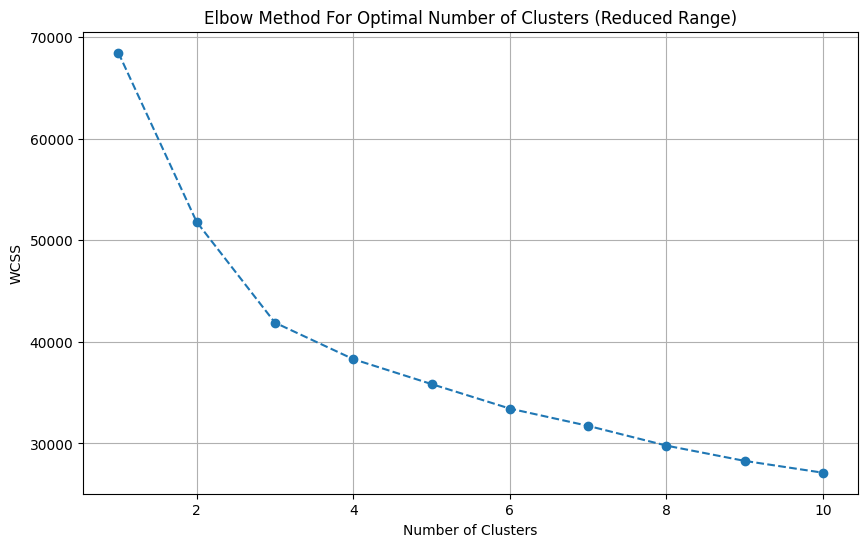

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [91]:
# using k means - clustering

n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [92]:
df = df.iloc[:,:-18]

In [93]:
df['furnishing_type'] = cluster_assignments

In [99]:
df['furnishDetails'].isnull().sum()

981

In [97]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 = unfurnished
# 1 = semifurnished
# 2 = furnished

,furnishDetails,furnishing_type
427,NaN,1
41,"['4 Wardrobe', '7 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '11 Light', '1 Chimney', '1 Modular Kitchen', '6 AC', '1 Curtains', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
620,"['2 Wardrobe', '4 Fan', '2 Geyser', '4 Light', '3 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
570,"['5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
1327,"['1 Water Purifier', '9 Fan', '1 Fridge', '1 Exhaust Fan', '9 Geyser', '20 Light', '9 AC', '1 Modular Kitchen', '9 TV', '9 Wardrobe', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Sofa', 'No Stove', 'No Washing Machine']",0


# **Features Column**

In [107]:
df[['society','features']].sample(5)

,society,features
2735,capital residences 360,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
819,ss the leaf,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Maintenance Staff', 'Separate entry for servant room', 'No open drainage around', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
2688,godrej nature plus,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
752,antriksh heights,"['Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']"
1161,antriksh heights,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Separate entry for servant room', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"


In [106]:
# checking for null values

df['features'].isnull().sum()

635

In [108]:
# importing the appartments dataset
app_df = pd.read_csv('/content/appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [109]:
# converting to lower values
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [111]:
# storing all null values in temp_df

temp_df = df[df['features'].isnull()]

In [112]:
temp_df.shape

(635, 26)

In [113]:
# merging the temp_df and app_df on column "society" from temp_Df and "PropertyName" from a apprartment on basis of left join

x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [114]:
# putting all x values in original dataframe

df.loc[temp_df.index,'features'] = x.values

In [115]:
df['features'].isnull().sum()   #before we have 635 missing values

481

In [117]:
# now, creating new vector on basis on every values

from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [118]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [119]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2680,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3423,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1640,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3782,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0


In [120]:
features_binary_df.shape

(3803, 130)

In [121]:
# using k-means clustering

wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

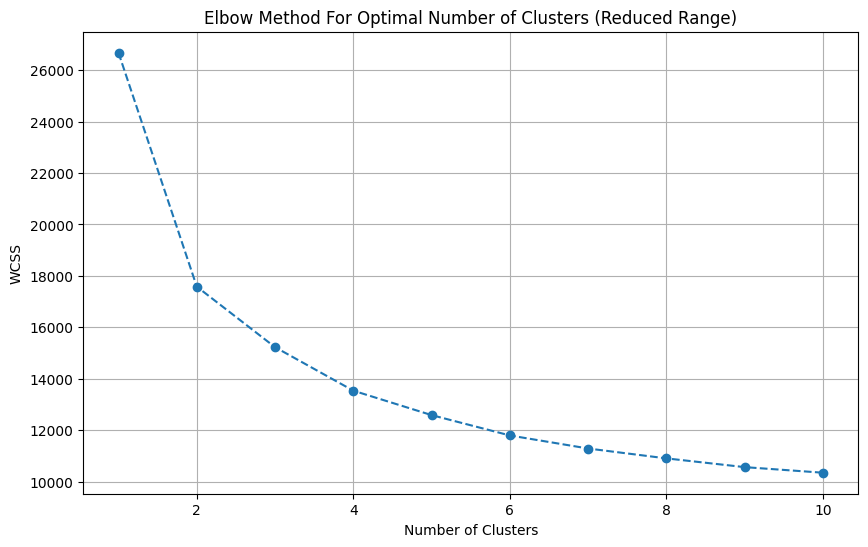

In [123]:
# elbow method to find the coorect categorires to use and Ploting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

**Moving ahead with different apporach of creating a luxruy score on the basis of feature having each flat**

In [124]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution

weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculating luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [125]:
df['luxury_score'] = luxury_score

In [126]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,m3m soulitude,sector 89,1.32,16923.0,780.0,Carpet area: 780 (72.46 sq.m.),3,3,3,not available,1.0,NaN,Under Construction,"['Vatika Town Square-INXT', 'Sector 86 Road', 'Dwarka Expy', 'Delh-Ajmer Expy', 'Euro International School', 'Gurugram University', 'Genesis Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,NaN,780.0,0,0,0,0,0,1,"[Power Back-up, Intercom Facility, Lift(s), Swimming Pool, Park, Piped-gas, Internet/wi-fi connectivity, Fitness Centre / GYM, Club house / Community Center, Rain Water Harvesting]",45
1,flat,signature global city 92,sector 92,0.78,11142.0,700.0,Super Built up area 1010(93.83 sq.m.)Carpet area: 700 sq.ft. (65.03 sq.m.),2,2,3,others,2.0,NaN,Under Construction,"['Iris Broadway Mall', 'Pataudi Road', 'Dwarka Expressway', 'Royal Institute Of Science & Management', 'RPS International School', 'IMT Manesar', 'Aarvy Healthcare Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction', 'Holiday Inn Sector 90']","['4 Fan', '4 Light', '3 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']",1010.0,NaN,700.0,0,0,0,0,1,1,"[Lift(s), Swimming Pool, Park, Fitness Centre / GYM, Club house / Community Center]",24
2,house,independent,sector 12,1.00,74074.0,135.0,Plot area 135(12.54 sq.m.)Built Up area: 3750 sq.ft. (348.39 sq.m.),9,7,3+,"pooja room,store room",3.0,North,Moderately Old,"['Palam triangle', 'Palam Vihar Vyapar kendra', 'HUDA Sector 23 Market', 'Ram Mandir', 'Sheetla Mata Mandir', 'Kalyan Hospital Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Metro Hospital and Heart Institute Gurgaon', ""Dr. Anurag's Child Care Clinic"", 'Chirag Hospital Pvt. Ltd', 'Jiya Clinic', 'Dr. Mittal Clinic', 'Yashroop Medical Centre', 'R K Hospital Gurgaon', 'Jeevan Jyoti Hospital Gurgaon', 'Dr. Sindhu Clinic', 'Apollo Cradle Hospital Gurgaon', 'Sneh Hospital Gurgaon', 'Sheetla Clinic', 'Kishor Clinic', 'Children Hospital', 'Bhardwaj Hospital', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Axis bank', 'Punjab national bank', 'Oriental bank of commerce', 'Catholic syrian bank', 'Karur vysay bank', 'Oriental bank of commerce', 'Big Cinemas', ""McDonald's"", 'Moti Mahal', 'Pind Baluchi', 'Cafe Coffee Day', 'Pizza Hut', ""Domino's Pizza"", 'Om Sweets', 'Cafe Coffee Day', 'THE NORTHCAP UNIVERSITY', 'Masti ki Pathshala Teach India', 'Chiranjiv Bharati School', 'Swiss Cottage school', 'Lieutenant Atul Kataria School', 'Palam vihar railway station', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']",NaN,"['No open drainage around', 'Internet/wi-fi connectivity']",NaN,3750.0,NaN,0,0,1,1,0,1,"[No open drainage around, Internet/wi-fi connectivity]",7
3,flat,sare crescent parc,sector 92,0.70,5556.0,1260.0,Built Up area: 140 (117.06 sq.m.),3,3,2,not available,14.0,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. Sarkar Clinic', 'Sagar Clinic', 'Vijay Petrol Pump', 'HP Petrol Pump', 'Essar Petrol Pump', 'Indian Oil']",[],"['Lift(s)', 'Swimming Pool', 'Park', 'Club house / Community Center', 'Fitness Centre / GYM', 'Shopping Centre', 'Rain Water Harvesting']",NaN,140.0,NaN,0,0,0,0,0,1,"[Lift

In [127]:
# cols to drop (nearbyLocations,furnishDetails, features,features_list, additionalRoom)

df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [128]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3767,flat,dlf the ultima,sector 81,2.25,10755.0,2092.0,Super Built up area 2092(194.35 sq.m.)Built Up area: 2090 sq.ft. (194.17 sq.m.)Carpet area: 2087 sq.ft. (193.89 sq.m.),3,4,3+,11.0,West,Relatively New,2092.0,2090.00,2087.0,0,1,0,0,0,0,174
2869,flat,m3m heights,sector 65,1.90,13991.0,1358.0,Built Up area: 1358 (126.16 sq.m.),2,2,2,40.0,NaN,Undefined,NaN,1358.00,NaN,0,0,0,0,0,1,48
1384,flat,sare homes,sector 92,0.82,5384.0,1523.0,Super Built up area 1523(141.49 sq.m.)Built Up area: 1221.18 sq.ft. (113.45 sq.m.),3,3,3+,12.0,West,Relatively New,1523.0,1221.18,NaN,0,0,0,0,0,1,114
1128,house,independent,sector 4,4.12,8889.0,4635.0,Plot area 515(430.61 sq.m.),2,1,3+,NaN,NaN,Moderately Old,NaN,4635.00,NaN,0,0,0,0,0,1,0
3124,flat,microtek greenburg,sector 86,1.45,9797.0,1480.0,Built Up area: 1480 (137.5 sq.m.)Carpet area: 1050 sq.ft. (97.55 sq.m.),3,2,3,8.0,North-East,Relatively New,NaN,1480.00,1050.0,0,0,0,0,0,0,72


In [129]:
df.shape

(3803, 23)

In [130]:
# exporting the current state of data

df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)